# EE338 - Digital Signal Processing
# Filter Design Assessment (EC4)
# Samar Jain (180010052)

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

## Filter 1 : Band Pass Filter

### IIR Filter Design

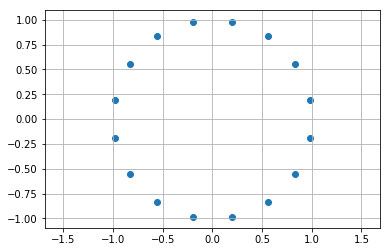

In [9]:
# generating pole-zero plot (butterworth)
poles1 = []
x1 = []
y1 = []
for k in range(16):
    a = complex(np.cos((((2*k+1)/16)+0.5)*np.pi),np.sin((((2*k+1)/16)+0.5)*np.pi))
    poles1.append(a)
    x1.append(a.real)
    y1.append(a.imag)
plt.scatter(x1,y1)
plt.grid()
plt.axis('equal')
plt.show()

In [10]:
# the poles from the left-half plane are printed below
polesbutt = poles1[:8] #butterworth poles selected
polesbutt

[(-0.1950903220161282+0.9807852804032304j),
 (-0.555570233019602+0.8314696123025453j),
 (-0.8314696123025453+0.5555702330196022j),
 (-0.9807852804032304+0.1950903220161286j),
 (-0.9807852804032304-0.19509032201612836j),
 (-0.8314696123025455-0.555570233019602j),
 (-0.5555702330196022-0.8314696123025452j),
 (-0.19509032201612866-0.9807852804032303j)]

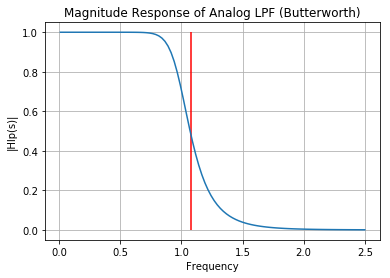

In [16]:
# from the butterworth approximation we load the parameters obtained
Nbutt = 8 #order
fcbutt = 1.082 #cut-off freq
fbp = np.linspace(0.01, 2.5, 100)
sbutt = fbp*1j
Hlpbutt = 1
# generating Hlp(s)
for i in polesbutt:
    Hlpbutt /= sbutt-i
plt.plot(fbp,np.absolute(Hlpbutt))
plt.vlines(fcbutt,0,1, 'r')
plt.xlabel('Frequency')
plt.ylabel('|Hlp(s)|')
plt.title('Magnitude Response of Analog LPF (Butterworth)')
plt.grid()
plt.show()

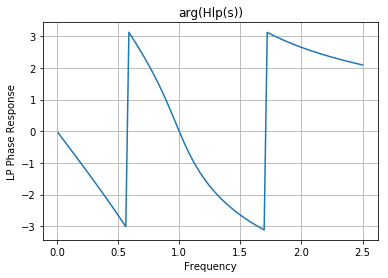

In [17]:
plt.plot(fbp, np.angle(Hlpbutt))
plt.xlabel('Frequency')
plt.ylabel('LP Phase Response')
plt.title('arg(Hlp(s))')
plt.grid()
plt.show()

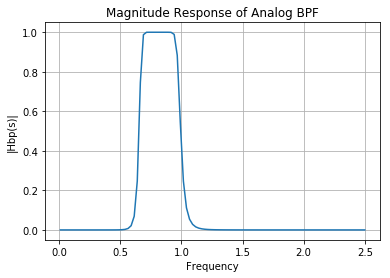

In [20]:
# obtaining band-pass character from H(s)
sbp = (((sbutt)**2)+0.649)/(0.318*sbutt)
Hbp = 1
for i in polesbutt:
    Hbp /= sbp-i
plt.plot(fbp, np.absolute(Hbp))
plt.xlabel('Frequency')
plt.ylabel('|Hbp(s)|')
plt.title('Magnitude Response of Analog BPF')
plt.grid()
plt.show()

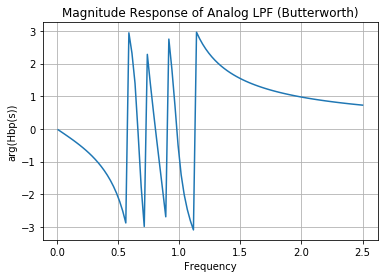

In [21]:
plt.plot(fbp, np.angle(Hbp))
plt.xlabel('Frequency')
plt.ylabel('arg(Hbp(s))')
plt.title('Magnitude Response of Analog LPF (Butterworth)')
plt.grid()
plt.show()

## Filter 2 : Band Stop Filter

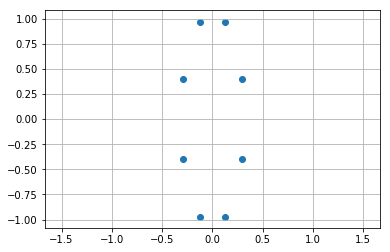

In [22]:
# generating pole-zero plot (chebyshev)
poles2 = []
x2 = []
y2 = []
for k in range(8):
    a = complex(-0.319*np.sin((((2*k+1)/8)+0.5)*np.pi),1.049*np.cos((((2*k+1)/8)+0.5)*np.pi))
    poles2.append(a)
    x2.append(a.real)
    y2.append(a.imag)
plt.scatter(x2,y2)
plt.grid()
plt.axis('equal')
plt.show()

In [23]:
# the poles are printed below
polescheb = [poles2[0], poles2[1], poles2[6], poles2[7]]
polescheb

[(-0.29471757087110045-0.4014349205509791j),
 (-0.12207601492446368-0.9691496296043397j),
 (-0.1220760149244637+0.9691496296043397j),
 (-0.2947175708711004+0.40143492055097985j)]

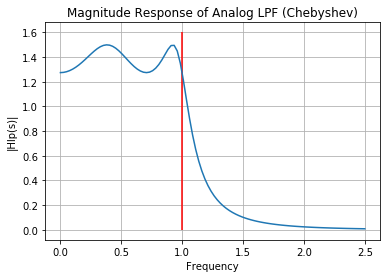

In [24]:
# from the chebyshev approximation we load the parameters
Nbs = 4 #order
e = 0.619 #epsilon
fp = 1
fbs = np.linspace(0, 2.5, 100)
scheb = fbs*1j
Hlpcheb = (1-e*e)**(-0.5)
for i in polescheb:
    Hlpcheb *= i
    Hlpcheb /= scheb-i
plt.plot(fbs,np.absolute(Hlpcheb))
plt.vlines(fp,0,1.6, 'r')
plt.xlabel('Frequency')
plt.ylabel('|Hlp(s)|')
plt.title('Magnitude Response of Analog LPF (Chebyshev)')
plt.grid()
plt.show()

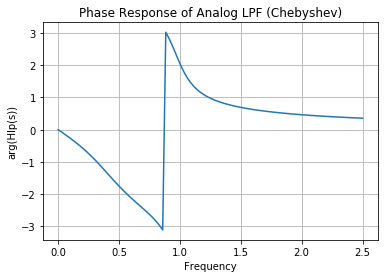

In [25]:
plt.plot(fbs, np.angle(Hlpcheb))
plt.xlabel('Frequency')
plt.ylabel('arg(Hlp(s))')
plt.title('Phase Response of Analog LPF (Chebyshev)')
plt.grid()
plt.show()

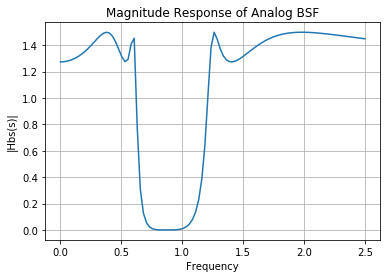

In [26]:
# obtaining band-stop character from Hllp(s)
sbs = (0.613*scheb)/(scheb*scheb+0.755)
Hbs = (1-e*e)**(-0.5)
for i in polescheb:
    Hbs *= i
    Hbs /= sbs-i
plt.plot(fbs, np.absolute(Hbs))
plt.xlabel('Frequency')
plt.ylabel('|Hbs(s)|')
plt.title('Magnitude Response of Analog BSF')
plt.grid()
plt.show()

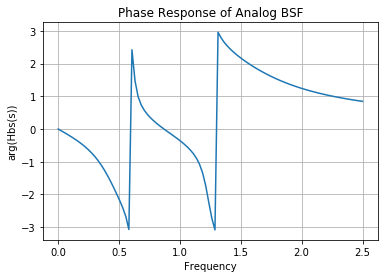

In [27]:
plt.plot(fbs, np.angle(Hbs))
plt.xlabel('Frequency')
plt.ylabel('arg(Hbs(s))')
plt.title('Phase Response of Analog BSF')
plt.grid()
plt.show()